# **Coursera Course Dataset Analysis**

As a data analyst at a tech company, you’ve been approached by a colleague from HR with a request to analyze a Coursera course dataset. The goal is to identify suitable courses for upskilling employees across different departments. The company is not ready to invest in an enterprise subscription, so the focus is on finding high-impact courses that maximize value for the organization’s varied skill sets and experience levels.

**Hypotheses and Questions:**

1. **AI Relevance:**

 - Hypothesis: Courses related to AI will be among the most beneficial for employees across various departments.
 - Questions:
   - Which course would likely be beneficial for employees across various departments?

2. **Broad Impact Courses:**

 - Hypothesis: Courses with broad applicability (e.g., data literacy, Python programming, marketing analytics) will provide cross-departmental value.
 - Questions:
   - Which courses focus on foundational or widely applicable skills like data analysis, Python, and marketing?
   - Are these courses well-rated and accessible to employees at different experience levels?

3. **Targeting Department Needs:**

 - Hypothesis: Each department can benefit from courses tailored to their specific needs (e.g., Python courses for developers, data visualization for the data team, people management for HR, digital marketing for Marketing).
 - Questions:
   - Which courses align with the unique needs of each department?
   - Are there specific skills or knowledge areas that are notably missing from the available course selection?

### **Analysis Steps:**

1. **Data Cleaning:** Ensure data is accurate and clean (handle missing values, format data consistently).
2. **Exploratory Data Analysis (EDA):**
   - Visualize course ratings, enrollment numbers, and course categories.
   - Analyze the prevalence of AI-related courses and other relevant topics.
   - Examine course difficulty levels and assess how well they meet different seniority needs.
3. **Department-Specific Analysis:**
   - Filter and identify courses that match the specific needs of marketing, development, HR, and management teams.
4. **Recommendation Development:**
   - Summarize findings and highlight top courses for upskilling in AI and relevant department-specific topics.
   - Recommend courses based on cross-departmental value, skill level diversity, and cost-effectiveness.

### **Step 1: Load the data**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
%matplotlib inline

In [54]:
#  course_data = pd.read_csv("coursea_data.csv")
course_data = pd.read_csv(("coursea_data.csv"), index_col=0)
course_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
Column1,,,,,,
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


### **Step 2: Data Cleaning**

#### 2.1 Handling Missing Values: We'll check for missing values using the combination of isna() and sum() methods. If it returns zero, we have no missing values to deal with.

In [55]:
course_data.isna().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

#### 2.2 Removing Duplicates: Using the duplicated() method, we check if there are repetitive entries in the dataset.

In [56]:
course_data.duplicated().sum()

0

In [57]:
course_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


#### 2.3 Let's look at the datatypes of each column.

From this we can infer that the majority of variables are object-type (in this case, strings), but we could also make the dataset more accessible for manipulation by converting some of the features:

- into categorical: **course_difficulty** and **course_Certificate_type**;
- into numerical: **course_students_enrolled**

First, let's set features to categorical

In [58]:
course_data['course_Certificate_type'] = course_data.course_Certificate_type.astype('category')
course_data['course_difficulty'] = course_data.course_difficulty.astype('category')

Setting enrolled student count to numerical:

In [59]:
def value_to_float(x):
   
    if isinstance(x, str):
        if 'k' in x:
            return float(x.replace('k', '')) * 1000 if len(x) > 1 else 1000.0
        if 'm' in x:
            return float(x.replace('m', '')) * 1000000 if len(x) > 1 else 1000000.0
   
    elif isinstance(x, (int, float)):
        return float(x)
    
    return 0.0  

course_data['course_students_enrolled'] = course_data['course_students_enrolled'].apply(value_to_float)

In [60]:
course_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   course_title              891 non-null    object  
 1   course_organization       891 non-null    object  
 2   course_Certificate_type   891 non-null    category
 3   course_rating             891 non-null    float64 
 4   course_difficulty         891 non-null    category
 5   course_students_enrolled  891 non-null    float64 
dtypes: category(2), float64(2), object(2)
memory usage: 36.9+ KB


### **Step 3: Exploratory Data Analysis (EDA)**
EDA helps us understand the underlying patterns and relationships in the data.

Let's look at some summary statistics:
- The most popular course
- The least popular course
- The best rated course
- The worst rated course
- The number of features
- The number of observations
- The institution with the most courses offered
- The number of institutions offering courses

In [61]:
print('1. The most popular course is: \n')
course_data.iloc[course_data['course_students_enrolled'].idxmax()]

1. The most popular course is: 



course_title                AI For Everyone
course_organization         deeplearning.ai
course_Certificate_type              COURSE
course_rating                           4.8
course_difficulty                  Beginner
course_students_enrolled           350000.0
Name: 54, dtype: object

In [62]:
print('2. The least popular course is: \n')
course_data.iloc[course_data['course_students_enrolled'].idxmin()]

2. The least popular course is: 



course_title                Terrorism and Counterterrorism: Comparing Theo...
course_organization                                       Universiteit Leiden
course_Certificate_type                                                COURSE
course_rating                                                             4.8
course_difficulty                                                    Beginner
course_students_enrolled                                              90000.0
Name: 298, dtype: object

In [63]:
print('3. The best rated course is: \n')
course_data.iloc[course_data['course_rating'].idxmax()]

3. The best rated course is: 



course_title                Terrorism and Counterterrorism: Comparing Theo...
course_organization                                       Universiteit Leiden
course_Certificate_type                                                COURSE
course_rating                                                             4.8
course_difficulty                                                    Beginner
course_students_enrolled                                              90000.0
Name: 298, dtype: object

In [64]:
print('4. The worst rated course is: \n')
course_data.iloc[course_data['course_rating'].idxmin()]

4. The worst rated course is: 



course_title                                    Supply Chain Analytics
course_organization         Rutgers the State University of New Jersey
course_Certificate_type                                         COURSE
course_rating                                                      4.7
course_difficulty                                             Beginner
course_students_enrolled                                        7900.0
Name: 483, dtype: object

In [65]:
print('5. The number of features in the set: \n')
print(f'There are {len(course_data.columns)} features in this set')

5. The number of features in the set: 

There are 6 features in this set


In [66]:
print('6. The number of observations in the set: \n')
print(f'There are {len(course_data.index)} observations in this set')

6. The number of observations in the set: 

There are 891 observations in this set


In [67]:
print('7. The organization with most courses: \n')
print(f"The most courses are offered by {course_data['course_organization'].value_counts().idxmax()}, offering {course_data['course_organization'].value_counts().max()} courses.")

7. The organization with most courses: 

The most courses are offered by University of Pennsylvania, offering 59 courses.


In [68]:
print(f"8. The courses are offered by {course_data['course_organization'].value_counts().count()} different institutions.")

8. The courses are offered by 154 different institutions.


In [69]:
ai_keywords = ['AI', 'Machine Learning', 'Deep Learning', 'Data Science']
ai_courses = course_data[course_data['course_title'].str.contains('|'.join(ai_keywords), case=False)]
ai_courses_summary = ai_courses[['course_title', 'course_rating', 'course_students_enrolled']]
ai_courses_summary_sorted = ai_courses_summary.sort_values(by='course_students_enrolled', ascending=False)
ai_courses_summary_sorted.head()

,course_title,course_rating,course_students_enrolled
Column1,,,
6,Machine Learning,4.9,3200000.0
13,Data Science,4.5,830000.0
15,Data Science: Foundations using R,4.6,740000.0
5,Deep Learning,4.8,690000.0
62,Neural Networks and Deep Learning,4.9,630000.0


In [70]:
ai_courses_by_rating = ai_courses.sort_values(by=['course_rating', 'course_students_enrolled'], ascending=False)
ai_courses_by_rating.head(4)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
Column1,,,,,,
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
62,Neural Networks and Deep Learning,deeplearning.ai,COURSE,4.9,Intermediate,630000.0
249,Understanding the Brain: The Neurobiology of E...,The University of Chicago,COURSE,4.9,Beginner,130000.0
318,In the Studio: Postwar Abstract Painting,The Museum of Modern Art,COURSE,4.9,Beginner,79000.0


In [71]:
department_keywords = {
    'Python Developers': ['Python', 'Machine Learning', 'Deep Learning'],
    'Data Team': ['Data Science', 'AI', 'Big Data'],
    'HR': ['AI in HR', 'HR Tech'],
    'Marketing': ['AI for Marketing', 'Digital Marketing'],
    'Management': ['Leadership', 'AI for Business']
}

relevant_courses = {}
for dept, keywords in department_keywords.items():
    relevant_courses[dept] = course_data[course_data['course_title'].str.contains('|'.join(keywords), case=False)]

relevant_courses['Management'].head(4)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
Column1,,,,,,
824,Building Your Leadership Skills,HEC Paris,COURSE,4.5,Mixed,67000.0
890,Compassionate Leadership Through Service Learn...,University of Colorado Boulder,COURSE,4.9,Beginner,6400.0
775,Foundations of Everyday Leadership,University of Illinois at Urbana-Champaign,COURSE,4.8,Mixed,62000.0
845,"High Performance Collaboration: Leadership, Te...",Northwestern University,COURSE,4.8,Mixed,46000.0


### **Step 4: Data Visualization**

Correlation heatmap to show the relationship between two numerical columns: **course_rating** and **course_students_enrolled**

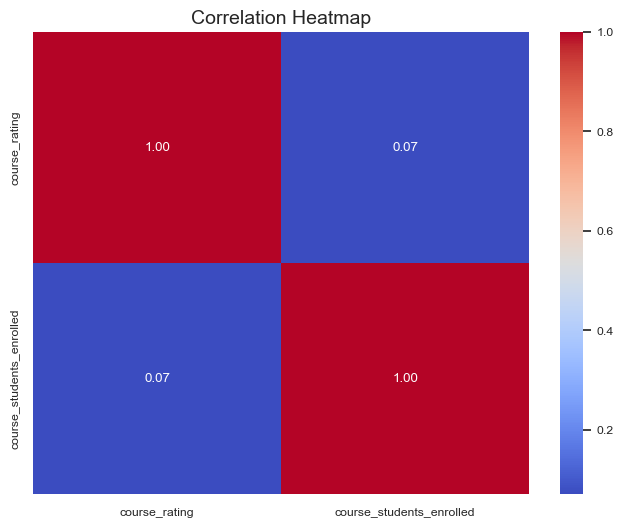

In [72]:
numerical_data = course_data[["course_rating", "course_students_enrolled"]]

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

**Diagonal Values (1.00):** These represent the correlation of each variable with itself, which is always 1 (or perfect correlation).

**Off-Diagonal Value (0.07):** A correlation of 0.07 is very close to 0, which indicates almost no linear relationship between the course rating and the number of students enrolled.

This means that the course rating does not seem to be strongly related to how many students enroll in a course.

Text(0, 0.5, '')

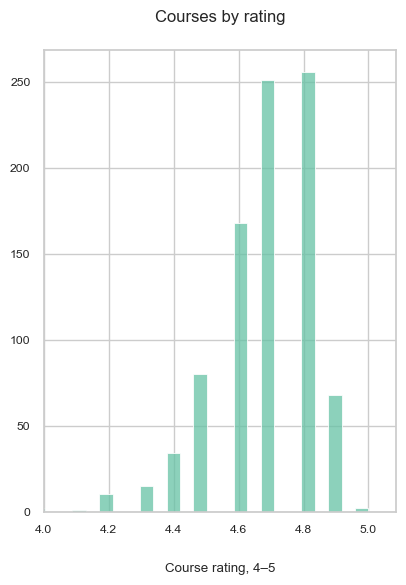

In [73]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 2)
sns.histplot(course_data['course_rating'])
plt.title('Courses by rating', pad=20, fontsize = 12)
plt.xlabel('Course rating, 4–5', labelpad=20)
plt.xlim(left=4)
plt.ylabel('')

### Plotting Categorical Features

Let's explore **course organization** a bit further by categorizing the course providers to give us additional insights.

We can draft preliminary categories:

- Universities/Colleges
- Companies/Tech Firms
- Business Schools
- Non-Profit/Educational Organizations
- Industry Certification/Professional Development

In [74]:
course_data['course_organization_type'] = 'NaN'
course_data = course_data[['course_title',
 'course_organization',
 'course_organization_type',
 'course_Certificate_type',
 'course_rating',
 'course_difficulty',
 'course_students_enrolled'
 ]]

In [75]:
universities = [
    'Yale University', 'University of Michigan', 'Stanford University',
    'University of Pennsylvania', 'Macquarie University', 'Johns Hopkins University',
    'University of Illinois at Urbana-Champaign', 'University of California, Irvine',
    'Georgia Institute of Technology', 'Duke University', 'Columbia University',
    'Northwestern University', 'Rutgers the State University of New Jersey',
    'University of Minnesota', 'University of Virginia', 'Imperial College London',
    'Arizona State University', 'Universitat Autònoma de Barcelona', 'Wesleyan University',
    'University of Alberta', 'University of California, Davis', 'University of Geneva',
    'University of Amsterdam', 'The Hong Kong University of Science and Technology',
    'UNSW Sydney (The University of New South Wales)', 'Rice University',
    'National Research University Higher School of Economics', 'Michigan State University',
    'Pontificia Universidad Católica de Chile', 'Yonsei University', 'University of Colorado Boulder',
    'University of California San Diego', 'University of Toronto', 'Peking University',
    'University of Washington', 'University System of Georgia', 'West Virginia University',
    'Saint Petersburg State University', 'New York University', 'Case Western Reserve University',
    'The University of Edinburgh', 'The University of Sydney', 'University of Colorado System',
    'Universidad Nacional Autónoma de México', 'University at Buffalo', 'Universidade de São Paulo',
    'The University of Chicago', 'Goldsmiths, University of London', 'Erasmus University Rotterdam',
    'University of Pittsburgh', 'Universiteit Leiden', 'Birkbeck, University of London',
    'The University of North Carolina at Chapel Hill', 'Vanderbilt University',
    'The George Washington University', 'University of Maryland, College Park', 'University of Cape Town',
    'Emory University', 'Shanghai Jiao Tong University', 'University of Copenhagen',
    'Tecnológico de Monterrey', 'Lund University', 'Nanyang Technological University, Singapore',
    'Universidade Estadual de Campinas', 'Universidad de los Andes', 'Hebrew University of Jerusalem',
    'University of Florida', 'The University of Melbourne', 'Universidad de Chile',
    'University of London', 'McMaster University', 'Ludwig-Maximilians-Universität München (LMU)',
    'University of California, Santa Cruz', 'The State University of New York',
    'The Pennsylvania State University', 'Moscow Institute of Physics and Technology',
    'Royal Holloway, University of London', 'Technical University of Denmark (DTU)',
    'Eindhoven University of Technology', 'Novosibirsk State University', 'The University of Tokyo',
    'University of Lausanne', 'Tel Aviv University', 'Luther College at the University of Regina',
    'Peter the Great St. Petersburg Polytechnic University', 'Tsinghua University',
    'Universitat de Barcelona', 'National Taiwan University', 'University of New Mexico',
    'The University of Hong Kong', 'American Institute of Business and Economics'
]

tech_companies = [
    'IBM', 'Google', 'Google Cloud', 'Amazon Web Services', 'Cisco', 'Atlassian',
    'Mail.Ru Group', 'Cloudera', 'MathWorks', 'Crece con Google', 'Autodesk',
    'Palo Alto Networks', 'JetBrains', 'Unity', 'Automation Anywhere', 'VMware',
    'HubSpot Academy', 'ConsenSys Academy', 'ScrumTrek'
]

business_schools = [
    'London Business School', 'HEC Paris', 'IE Business School', 'INSEAD', 'EDHEC Business School',
    'ESSEC Business School', 'IESE Business School', 'Copenhagen Business School', 'Indian School of Business',
    'ESCP Business School', 'ESADE Business and Law School', 'Fundação Instituto de Administração'
]

non_profit_organizations = [
    'The Museum of Modern Art', 'American Museum of Natural History', 'E-Learning Development Fund',
    'Institute for the Future', 'Ticket for Change', 'Kalshoven-Gieskes Forum',
    'The Linux Foundation', 'National Arts Strategies', 'Bloomsbury Learning Exchange'
]

professional_certification_providers = [
    '(ISC)²', 'SAS', 'LearnQuest', 'New York Institute of Finance'
]

def categorize_organization(org_name):
    if org_name in universities:
        return 'University'
    elif org_name in tech_companies:
        return 'Tech Company'
    elif org_name in business_schools:
        return 'Business School'
    elif org_name in non_profit_organizations:
        return 'Non-Profit/Educational Organization'
    elif org_name in professional_certification_providers:
        return 'Professional Certification Provider'
    else:
        return 'Other'

course_data['course_organization_type'] = course_data['course_organization_type'].replace(to_replace="NaN", value="Other")

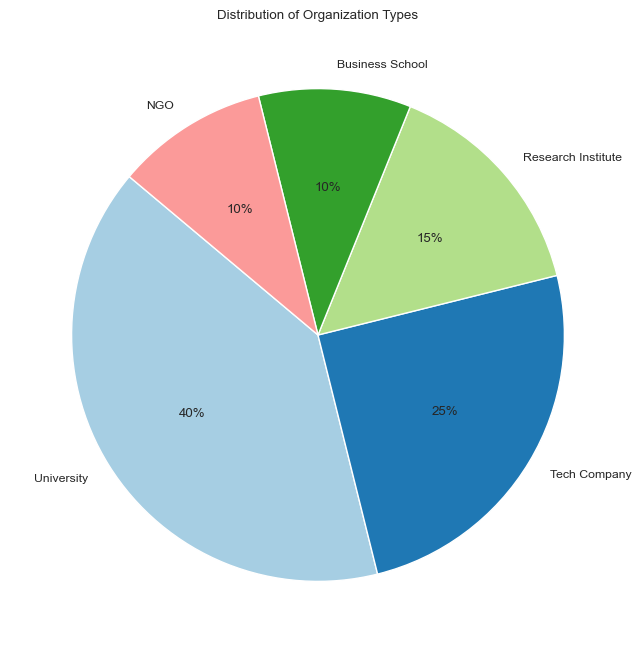

In [76]:
categories = ['University', 'Tech Company', 'Research Institute', 'Business School', 'NGO']
counts = [40, 25, 15, 10, 10]  

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.0f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Organization Types')
plt.show()

In summary, the data shows a strong dominance of **universities**, followed by **tech companies**, with research institutes and NGOs being less common among the organizations in this dataset. 

The distribution hints at a strategy geared toward fostering innovation through academia and technology, with research support and occasional social impact considerations, indicating a broad but prioritized approach to organizational collaboration.

Now, let's see how we could plot the remainder categorical values.

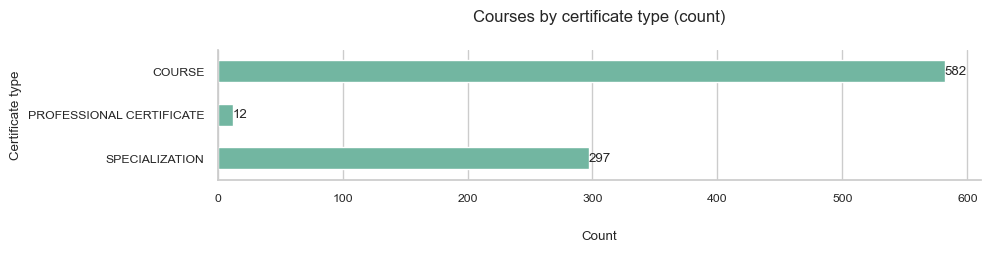

In [77]:
sns.set(font_scale=0.8)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette("Set2"))
ax= sns.catplot(course_data['course_Certificate_type'],
            kind="count",
            height=2, 
            aspect=5,
            width=0.5)
plt.title('Courses by certificate type (count)', pad=20, fontsize = 12)
plt.xlabel('Count', labelpad=20)
plt.ylabel('Certificate type')
for container in ax.ax.containers:
    ax.ax.bar_label(container)
plt.show()

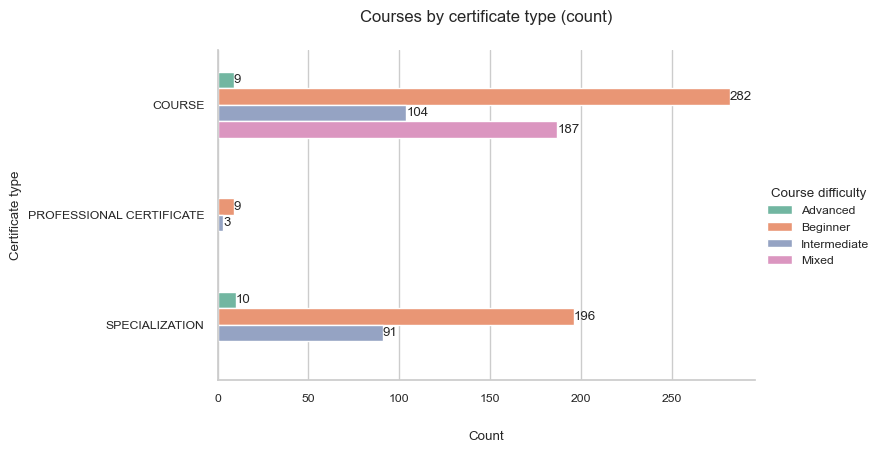

In [78]:
ax=certificate_count = sns.catplot(data=course_data,
            y='course_Certificate_type',
            kind="count",
            hue="course_difficulty",
            height=4, 
            aspect=2,
            width=0.6,
            orient='h',
            legend=True)
plt.title('Courses by certificate type (count)', pad=20, fontsize = 12)
certificate_count._legend.set_title("Course difficulty")
plt.xlabel('Count', labelpad=20)
plt.ylabel('Certificate type')
for container in ax.ax.containers:
    ax.ax.bar_label(container)
plt.show()

## **EDA Insights**

1. The most popular course is Machine Learning
2. The least popular course is El Abogado del Futuro: Legaltech y la TransformaciÃ³n Digital del Derecho
3. The best rated course is El Abogado del Futuro: Legaltech y la TransformaciÃ³n Digital del Derecho
4. The worst rated course is How To Create a Website in a Weekend! (Project-Centered Course)
5. The most courses are offered by University of Pennsylvania, offering 59 courses.
6. The data shows a strong dominance of **universities**, followed by **tech companies**, with research institutes and NGOs being less common among the organizations in this dataset. 



## **Conclusion and Recommendation**
- The course with the highest enrollment **("Machine Learning")** indicates a broad interest in foundational AI courses, which would likely be beneficial for employees across various departments.

- For broad organizational benefit, courses like **"Machine Learning"** could be prioritized due to its high enrollment and broad applicability to various teams.

- More specialized courses **(e.g., "AI For Medical Treatment")** could be beneficial for departments with specific AI-related needs, such as healthcare or medical fields

- **"Machine Learning"** and **"Neural Networks and Deep Learning"** should be prioritized as they have high ratings, cater to different experience levels, and cover core AI concepts that are applicable across departments like marketing, HR, Python developers, and the data team.

- The **Digital Marketing** course is highly suitable for the marketing department because it focuses on a core skill set for marketers.

- The current dataset was composed of mostly the object/categorical types of data, which limits the exploration, especially considering statistical inference, correlation and such.

- One improvement could be made by normalizing the ratings of courses by taking into account their popularity and using Bayesian average to weigh the rating by enrollment number.